## MARBL BGC diagnostics: 

### case 004 JRA forcing, x0.1

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
# import seawater as ?sw
# from seawater.library import T90conv
from scipy import stats
from cartopy.util import add_cyclic_point
from IPython.display import Image

### Define latest year and get the CESM data

In [2]:
case = 'g.e22.G1850ECO_JRA_HR.TL319_t13.004'
path = '/glade/campaign/cesm/development/bgcwg/projects/hi-res_JRA/cases/' + case + '/output/ocn/proc/tseries/month_1'
variables = ['sp_Fe_lim_Cweight_avg_100m','sp_P_lim_Cweight_avg_100m','sp_N_lim_Cweight_avg_100m',
             'diat_Fe_lim_Cweight_avg_100m', 'diat_P_lim_Cweight_avg_100m','diat_N_lim_Cweight_avg_100m',
             'diat_SiO3_lim_Cweight_avg_100m','diaz_P_lim_Cweight_avg_100m',
             'diaz_Fe_lim_Cweight_avg_100m','photoC_sp_zint',
             'photoC_diat_zint','photoC_diaz_zint','photoC_cocco_zint',
             'cocco_Fe_lim_Cweight_avg_100m','cocco_C_lim_Cweight_avg_100m','cocco_N_lim_Cweight_avg_100m',
             'cocco_P_lim_Cweight_avg_100m','CaCO3_PROD_zint','SiO2_PROD','POC_FLUX_100m',
             'coccoCaCO3','diatC', 'coccoC','spC','diazC','SALT',
             'PO4','Fe','NO3','SiO3','ALK','zooC','diaz_Nfix'] 
coords = {'x':'TLONG','y':'TLAT'}
year = 30

In [3]:
%%time
ds_list = []
print(f'reading {case}')
ds = xr.Dataset()

for v in variables:
    print(v)
    files = sorted(glob(f'{path}/{case}.pop.h.{v}.00{year}01-00{year}12.nc'))       
    dsv=xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time",
                       drop_variables=["transport_components", "transport_regions"], decode_times=True, chunks={'z_t' : 1})

    ds = xr.merge((ds, dsv))
    ds_list.append(ds)

reading g.e22.G1850ECO_JRA_HR.TL319_t13.004
sp_Fe_lim_Cweight_avg_100m
sp_P_lim_Cweight_avg_100m
sp_N_lim_Cweight_avg_100m
diat_Fe_lim_Cweight_avg_100m
diat_P_lim_Cweight_avg_100m
diat_N_lim_Cweight_avg_100m
diat_SiO3_lim_Cweight_avg_100m
diaz_P_lim_Cweight_avg_100m
diaz_Fe_lim_Cweight_avg_100m
photoC_sp_zint
photoC_diat_zint
photoC_diaz_zint
photoC_cocco_zint
cocco_Fe_lim_Cweight_avg_100m
cocco_C_lim_Cweight_avg_100m
cocco_N_lim_Cweight_avg_100m
cocco_P_lim_Cweight_avg_100m
CaCO3_PROD_zint
SiO2_PROD
POC_FLUX_100m
coccoCaCO3
diatC
coccoC
spC
diazC
SALT
PO4
Fe
NO3
SiO3
ALK
zooC
diaz_Nfix
CPU times: user 8min 51s, sys: 2min 15s, total: 11min 7s
Wall time: 11min 44s


### Keep only the variables we need

In [4]:
keepthese=['z_t','z_t_150m','time_bound','TAREA','REGION_MASK'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']
ds = ds.drop([v for v in ds.variables if v not in keep_vars])

In [5]:
cesm_ann_ds=ds.mean(dim='time')

In [6]:
cesm_ann_ds

<xarray.Dataset>
Dimensions:                         (nlat: 2400, nlon: 3600, z_t: 62, z_t_150m: 15)
Coordinates:
    TLONG                           (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                            (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
  * z_t_150m                        (z_t_150m) float32 500.0 1500.0 ... 14500.0
  * z_t                             (z_t) float32 500.0 1500.0 ... 587499.06
Dimensions without coordinates: nlat, nlon
Data variables:
    dz                              (z_t) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    REGION_MASK                     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    KMT                             (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TAREA                           (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    sp_Fe_lim_Cweight_avg_100m      (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    sp_P_lim_Cweight_avg_100m       (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    sp_N_lim_Cweight_avg_100m       (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    diat_Fe_lim_Cweight_avg_100m    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    diat_P_lim_Cweight_avg_100m     (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    diat_N_lim_Cweight_avg_100m     (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    diat_SiO3_lim_Cweight_avg_100m  (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    diaz_P_lim_Cweight_avg_100m     (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    diaz_Fe_lim_Cweight_avg_100m    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    photoC_sp_zint                  (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    photoC_diat_zint                (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    photoC_diaz_zint                (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    photoC_cocco_zint               (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    cocco_Fe_lim_Cweight_avg_100m   (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    cocco_C_lim_Cweight_avg_100m    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    cocco_N_lim_Cweight_avg_100m    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    cocco_P_lim_Cweight_avg_100m    (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    CaCO3_PROD_zint                 (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    SiO2_PROD                       (z_t, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    POC_FLUX_100m                   (nlat, nlon) float32 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    coccoCaCO3                      (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 2400, 3600), meta=np.ndarray>
    diatC                           (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 2400, 3600), meta=np.ndarray>
    coccoC                          (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 2400, 3600), meta=np.ndarray>
    spC                             (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 2400, 3600), meta=np.ndarray>
    diazC                           (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 2400, 3600), meta=np.ndarray>
    SALT                            (z_t, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.ndarray>
    PO4                             (z_t, nlat, nlon) float32 dask.array<chunksize=(1, 2400, 3600), meta=np.nda

#### World Ocean Atlas 2013

In [7]:
file = '/glade/work/kristenk/WOA_data/regrid_POP/WOA2018_x0.1POPgrid.nc' 
ds_woa = xr.load_dataset(file, decode_times=False, decode_coords=False)

In [8]:
ds_woa['z_t'] = cesm_ann_ds.z_t

In [9]:
lons=ds_woa.TLONG
lats=ds_woa.TLAT
area=ds_woa.TAREA
depths=ds_woa.z_t * 0.01
area_m=area * 1.e-4
dz_m=ds_woa.dz * 0.01

In [10]:
NO3_diff = cesm_ann_ds.NO3 - ds_woa.NO3
PO4_diff = cesm_ann_ds.PO4 - ds_woa.PO4
SiO3_diff = cesm_ann_ds.SiO3 - ds_woa.SiO3

In [11]:
rmse_global = xr.Dataset({v: cesm_ann_ds[v] for v in ['z_t']})

In [12]:
#help(esmlab.statistics)
rmse_global['NO3']=esmlab.statistics.weighted_rmsd(cesm_ann_ds.NO3, ds_woa.NO3, dim=['nlat', 'nlon'], weights=area)
rmse_global['PO4']=esmlab.statistics.weighted_rmsd(cesm_ann_ds.PO4, ds_woa.PO4, dim=['nlat', 'nlon'], weights=area)
rmse_global['SiO3']=esmlab.statistics.weighted_rmsd(cesm_ann_ds.SiO3, ds_woa.SiO3, dim=['nlat', 'nlon'], weights=area)

In [13]:
rmse_global.PO4.values

array([0.20026885, 0.20344004, 0.20896559, 0.21753996, 0.22992623,
       0.24522291, 0.26007806, 0.27177809, 0.27904524, 0.28486759,
       0.28457229, 0.28078806, 0.28156365, 0.27371539, 0.27081883,
       0.26502263, 0.25717701, 0.25361559, 0.24445095, 0.239843  ,
       0.23513653, 0.23523652, 0.22442798, 0.21564117, 0.21073493,
       0.20735543, 0.20553599, 0.20377058, 0.2004393 , 0.1963623 ,
       0.19127449, 0.18594644, 0.17979617, 0.17403427, 0.17793446,
       0.17866728, 0.1816766 , 0.18073601, 0.17330267, 0.17708226,
       0.18629917, 0.20445295, 0.22337412, 0.22659194, 0.22970211,
       0.22622563, 0.21768884, 0.2014165 , 0.1773179 , 0.15180553,
       0.12672085, 0.10716909, 0.09891059, 0.09351654, 0.08715375,
       0.08761064, 0.08989443, 0.09180767, 0.08849551, 0.08198715,
              nan,        nan])

In [14]:
rmse_global.NO3.values

array([3.24853168, 3.18690438, 3.20519813, 3.27204822, 3.40977601,
       3.51873771, 3.65365312, 3.76398767, 3.8275645 , 3.84807318,
       3.76053484, 3.67402308, 3.6757576 , 3.57523198, 3.56720255,
       3.52098751, 3.45019482, 3.45746157, 3.39915288, 3.41596476,
       3.47010102, 3.63758902, 3.56092183, 3.52710083, 3.61072553,
       3.74007482, 3.94943212, 4.24959492, 4.49276879, 4.82561057,
       5.11971274, 5.4767522 , 5.83253482, 6.26339424, 6.71388097,
       6.9541854 , 7.05294047, 6.93155981, 6.59859081, 6.25627359,
       5.62133371, 4.98617228, 4.25937941, 3.55679859, 3.01948183,
       2.81128978, 2.77894768, 2.72568032, 2.58535174, 2.36237003,
       2.06013212, 1.7646329 , 1.45430215, 1.31018366, 1.18164621,
       1.17487674, 1.13343699, 1.13318086, 1.06625476, 1.03931194,
              nan,        nan])

In [15]:
rmse_global.SiO3.values

array([11.10983865, 10.95780406, 10.87509524, 10.77136032, 10.64513456,
       10.50900991, 10.22779636, 10.02537878,  9.78014366,  9.51324874,
        9.28910863,  8.97061242,  8.72346643,  8.48694976,  8.32857495,
        8.1728381 ,  8.03230593,  7.95945522,  7.78247446,  7.69767896,
        7.55682441,  7.5125417 ,  7.44574529,  7.48011894,  7.50118054,
        7.54188792,  7.61098545,  7.66509236,  7.77301164,  7.99002778,
        8.31410388,  8.60367724,  9.01826361,  9.58793543, 10.3488285 ,
       10.91345208, 11.24966065, 11.05577776, 10.75003561, 10.04741181,
        8.88576478,  7.87651872,  7.33868559,  7.29936328,  7.51629715,
        7.82459121,  8.63358452,  9.39837785, 10.07156641, 10.49297126,
       10.58896317, 10.7918195 , 10.86449292, 10.68431463, 10.19882081,
       10.13529474,  9.54088935,  9.45115248,  9.35588674,  9.06935227,
               nan,         nan])

#### Surface nutrients

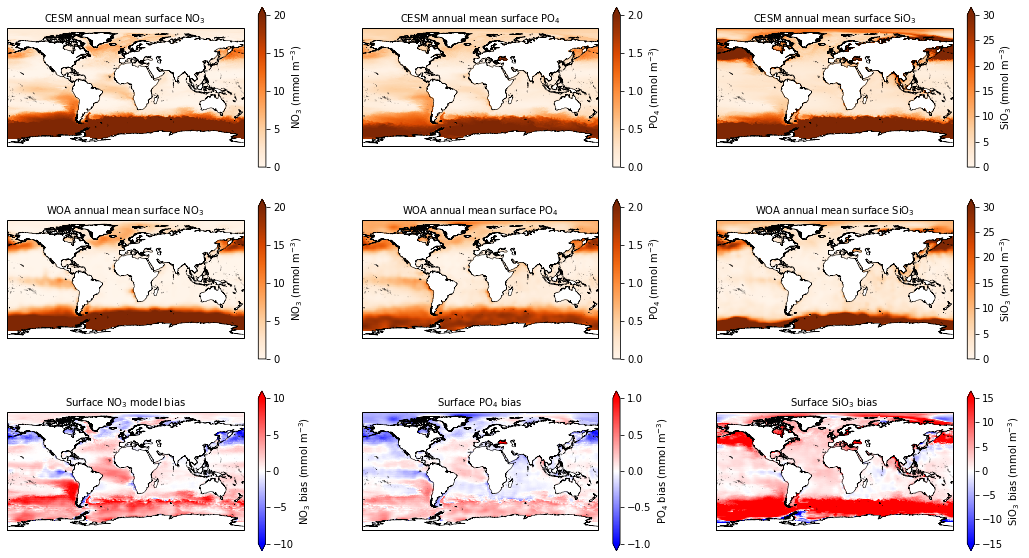

In [16]:
fig = plt.figure(figsize=(18,10))

####################NO3
#COLUMN 1  - NO3
#---- CESM panel
ax = fig.add_subplot(3,3,1, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM annual mean surface NO$_3$', fontsize=10)
pc1=ax.pcolormesh(lons, lats, 
                 cesm_ann_ds.NO3.isel(z_t=0), vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,4, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('WOA annual mean surface NO$_3$', fontsize=10)
pc2=ax.pcolormesh(lons, lats, 
                 ds_woa.NO3.isel(z_t=0), vmin=0, vmax=20, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='NO$_3$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,7, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Surface NO$_3$ model bias', fontsize=10)
pc3=ax.pcolormesh(lons, lats, 
                 NO3_diff.isel(z_t=0), vmin=-10, vmax=10, cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='NO$_3$ bias (mmol m$^{-3}$)')



####################PO4
#---- CESM panel
ax = fig.add_subplot(3,3,2, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM annual mean surface PO$_4$', fontsize=10)
pc1=ax.pcolormesh(lons, lats, 
                 cesm_ann_ds.PO4.isel(z_t=0), vmin=0, vmax=2, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,5, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('WOA annual mean surface PO$_4$', fontsize=10)
pc2=ax.pcolormesh(lons, lats, 
                 ds_woa.PO4.isel(z_t=0), vmin=0, vmax=2, cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='PO$_4$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,8, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Surface PO$_4$ bias', fontsize=10)
pc3=ax.pcolormesh(lons, lats, 
                 PO4_diff.isel(z_t=0), vmin=-1, vmax=1, cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='PO$_4$ bias (mmol m$^{-3}$)')



####################SiO3
#---- CESM panel
ax = fig.add_subplot(3,3,3, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM annual mean surface SiO$_3$', fontsize=10)
pc1=ax.pcolormesh(lons, lats, 
                 cesm_ann_ds.SiO3.isel(z_t=0), 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(3,3,6, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('WOA annual mean surface SiO$_3$', fontsize=10)
pc2=ax.pcolormesh(lons, lats, 
                 ds_woa.SiO3.isel(z_t=0), 
                  vmin=0, vmax=30, 
                  cmap='Oranges',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='SiO$_3$ (mmol m$^{-3}$)')

#---- DIFF panel
ax = fig.add_subplot(3,3,9, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('Surface SiO$_3$ bias', fontsize=10)
pc3=ax.pcolormesh(lons, lats, 
                 SiO3_diff.isel(z_t=0), 
                  vmin=-15, vmax=15, 
                  cmap='bwr',
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='SiO$_3$ bias (mmol m$^{-3}$)')



### Global nutrient profiles

In [17]:
ds_glb = xr.Dataset({v: cesm_ann_ds[v] for v in ['z_t']})
ds_glb['NO3']= esmlab.weighted_mean(cesm_ann_ds['NO3'], weights=area, dim=['nlat', 'nlon']).compute()
ds_glb['PO4']= esmlab.weighted_mean(cesm_ann_ds['PO4'], weights=area, dim=['nlat', 'nlon']).compute()
ds_glb['SiO3']= esmlab.weighted_mean(cesm_ann_ds['SiO3'], weights=area, dim=['nlat', 'nlon']).compute()

In [18]:
ds_glb_woa = xr.Dataset({v: cesm_ann_ds[v] for v in ['z_t']})
ds_glb_woa['NO3'] = esmlab.weighted_mean(ds_woa['NO3'], weights=area, dim=['nlat', 'nlon']).compute()
ds_glb_woa['PO4'] = esmlab.weighted_mean(ds_woa['PO4'], weights=area, dim=['nlat', 'nlon']).compute()
ds_glb_woa['SiO3'] = esmlab.weighted_mean(ds_woa['SiO3'], weights=area, dim=['nlat', 'nlon']).compute()

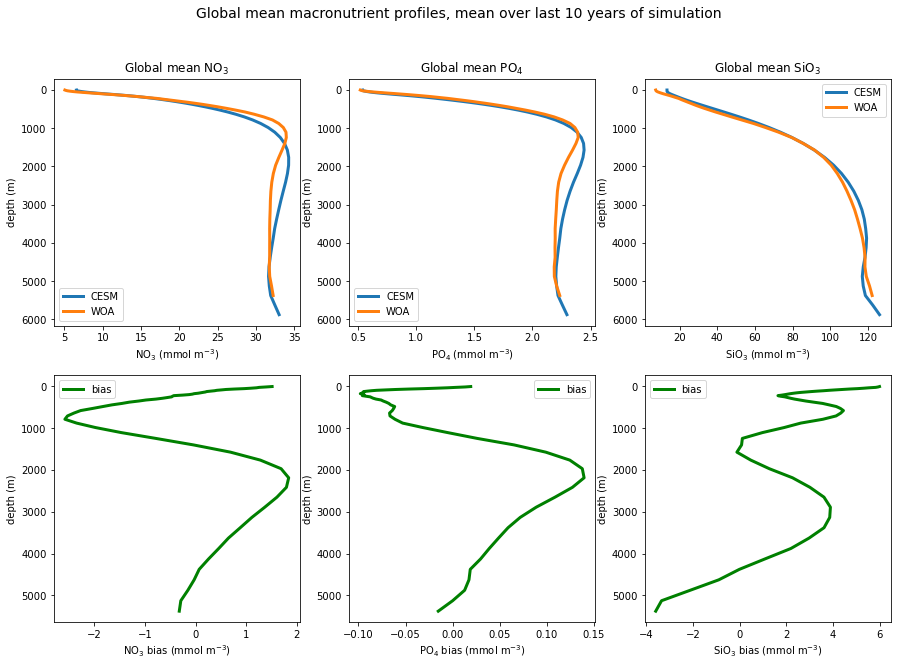

In [19]:
fig = plt.figure(figsize=(15,10))

plt.suptitle('Global mean macronutrient profiles, mean over last 10 years of simulation', fontsize=14)


#COLUMN 1  - NO3

ax = fig.add_subplot(2,3,1)
ax.set_title('Global mean NO$_3$')
ax.plot(ds_glb['NO3'].values, depths, label='CESM', linewidth=3)
ax.plot(ds_glb_woa['NO3'].values, depths, label='WOA', linewidth=3)
ax.legend()
ax.set(ylabel='depth (m)',xlabel='NO$_3$ (mmol m$^{-3}$)')
plt.gca().invert_yaxis()

#COLUMN 2  - PO4

ax = fig.add_subplot(2,3,2)
ax.set_title('Global mean PO$_4$')
ax.plot(ds_glb['PO4'].values, depths, label='CESM', linewidth=3)
ax.plot(ds_glb_woa['PO4'].values, depths, label='WOA', linewidth=3)
ax.legend()
ax.set(ylabel='depth (m)',xlabel='PO$_4$ (mmol m$^{-3}$)')
plt.gca().invert_yaxis()

#COLUMN 3  - SiO3

ax = fig.add_subplot(2,3,3)
ax.set_title('Global mean SiO$_3$')
ax.plot(ds_glb['SiO3'].values, depths, label='CESM', linewidth=3)
ax.plot(ds_glb_woa['SiO3'].values, depths, label='WOA', linewidth=3)
ax.legend()
ax.set(ylabel='depth (m)',xlabel='SiO$_3$ (mmol m$^{-3}$)')
plt.gca().invert_yaxis()


#COLUMN 1  - NO3 diff

ax = fig.add_subplot(2,3,4)
ax.plot(ds_glb['NO3'].values - ds_glb_woa['NO3'].values, depths, label='bias', linewidth=3, color='green')
ax.legend()
ax.set(ylabel='depth (m)',xlabel='NO$_3$ bias (mmol m$^{-3}$)')
plt.gca().invert_yaxis()

#COLUMN 2  - PO4 diff

ax = fig.add_subplot(2,3,5)
ax.plot(ds_glb['PO4'].values - ds_glb_woa['PO4'].values, depths, label='bias', linewidth=3, color='green')
ax.legend()
ax.set(ylabel='depth (m)',xlabel='PO$_4$ bias (mmol m$^{-3}$)')
plt.gca().invert_yaxis()

#COLUMN 3  - SiO3 diff

ax = fig.add_subplot(2,3,6)
ax.plot(ds_glb['SiO3'].values - ds_glb_woa['SiO3'].values, depths, label='bias', linewidth=3, color='green')
ax.legend()
ax.set(ylabel='depth (m)',xlabel='SiO$_3$ bias (mmol m$^{-3}$)')
plt.gca().invert_yaxis()



### Phytoplankton nutrient limitation at surface

In [20]:
#most limiting nutrient - concatenate the limitation terms so that nutrient limitation terms are each along the 'nutrient' dimension
# 0 = PO4
# 1 = Fe
# 2 = NO3 (only for sp and diat)
# 3 = Si (only for diat)
# 3 = C (only for cocco)
limarray_sp=xr.concat((cesm_ann_ds.sp_P_lim_Cweight_avg_100m, cesm_ann_ds.sp_Fe_lim_Cweight_avg_100m,cesm_ann_ds.sp_N_lim_Cweight_avg_100m),dim='nutrient')
limarray_diat=xr.concat((cesm_ann_ds.diat_P_lim_Cweight_avg_100m, cesm_ann_ds.diat_Fe_lim_Cweight_avg_100m, cesm_ann_ds.diat_N_lim_Cweight_avg_100m, cesm_ann_ds.diat_SiO3_lim_Cweight_avg_100m),dim='nutrient')
limarray_diaz=xr.concat((cesm_ann_ds.diaz_P_lim_Cweight_avg_100m, cesm_ann_ds.diaz_Fe_lim_Cweight_avg_100m),dim='nutrient')
limarray_cocco=xr.concat((cesm_ann_ds.cocco_P_lim_Cweight_avg_100m, cesm_ann_ds.cocco_Fe_lim_Cweight_avg_100m, cesm_ann_ds.cocco_N_lim_Cweight_avg_100m, cesm_ann_ds.cocco_C_lim_Cweight_avg_100m),dim='nutrient')

In [21]:
most_lim_sp=limarray_sp.argmin(dim='nutrient', skipna=False)
most_lim_diat=limarray_diat.argmin(dim='nutrient', skipna=False)
most_lim_diaz=limarray_diaz.argmin(dim='nutrient', skipna=False)
most_lim_cocco=limarray_cocco.argmin(dim='nutrient', skipna=False)
mask = np.isnan(cesm_ann_ds.cocco_P_lim_Cweight_avg_100m.squeeze())

In [22]:
most_lim_sp = most_lim_sp.squeeze()
most_lim_diat = most_lim_diat.squeeze()
most_lim_diaz = most_lim_diaz.squeeze()
most_lim_cocco = most_lim_cocco.squeeze()

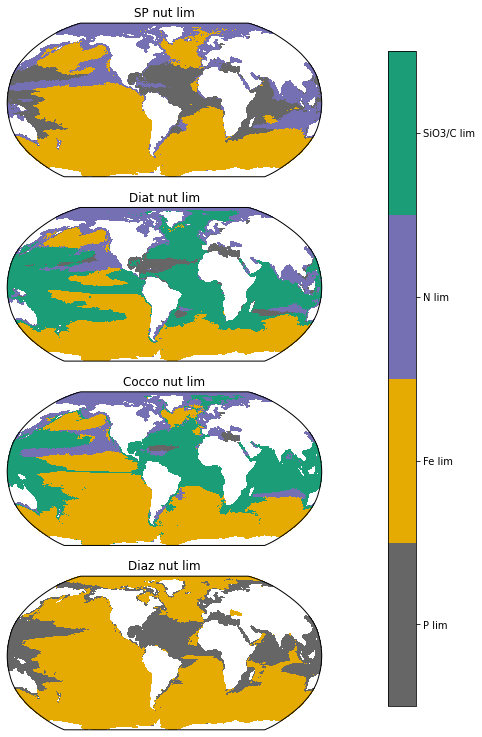

In [23]:
fig = plt.figure(figsize=(8,13))

ax = fig.add_subplot(4,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diat nut lim', fontsize=12)
pc=ax.pcolormesh(lons, lats, most_lim_diat.where(~mask), cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())
colorbar_specs = {'ticks' : np.arange(0,4,1)}

ax = fig.add_subplot(4,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('SP nut lim', fontsize=12)
pc=ax.pcolormesh(lons, lats, most_lim_sp.where(~mask), cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())
colorbar_specs = {'ticks' : np.arange(0,4,1)}

ax = fig.add_subplot(4,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Cocco nut lim', fontsize=12)
pc=ax.pcolormesh(lons, lats, most_lim_cocco.where(~mask), cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())
colorbar_specs = {'ticks' : np.arange(0,4,1)}

ax = fig.add_subplot(4,1,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diaz nut lim', fontsize=12)
pc=ax.pcolormesh(lons, lats, most_lim_diaz.where(~mask), cmap=plt.cm.get_cmap('Dark2_r',4),vmin=-0.5,vmax=3.5,transform=ccrs.PlateCarree())
colorbar_specs = {'ticks' : np.arange(0,4,1)}

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(pc, cax=cbar_ax,**colorbar_specs)
cbar.ax.set_yticklabels(['P lim', 'Fe lim', 'N lim','SiO3/C lim']);

### Look at phyto carbon pools

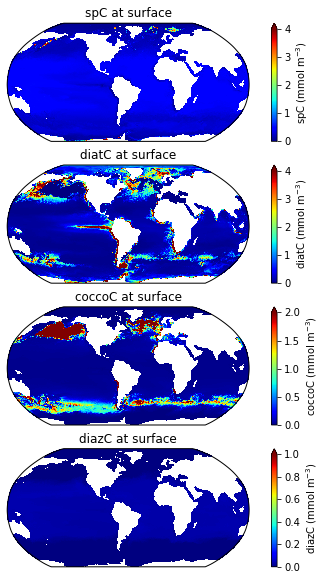

In [24]:
fig = plt.figure(figsize=(8,10))

ax = fig.add_subplot(4,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('coccoC at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.coccoC.isel(z_t_150m=0), cmap='jet',vmin=0,vmax=2,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='coccoC (mmol m$^{-3}$)')

ax = fig.add_subplot(4,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diatC at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.diatC.isel(z_t_150m=0), cmap='jet',vmin=0,vmax=4,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diatC (mmol m$^{-3}$)')

ax = fig.add_subplot(4,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('spC at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.spC.isel(z_t_150m=0), cmap='jet',vmin=0,vmax=2,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='spC (mmol m$^{-3}$)')

ax = fig.add_subplot(4,1,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diazC at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.diazC.isel(z_t_150m=0), cmap='jet',vmin=0,vmax=1,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diazC (mmol m$^{-3}$)')

### Phytoplankton production maps

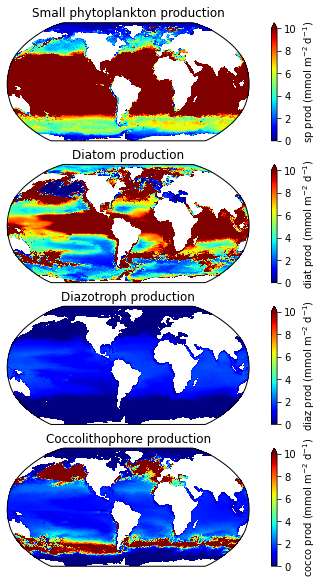

In [25]:
fig = plt.figure(figsize=(8,10))

ax = fig.add_subplot(4,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Small phytoplankton production', fontsize=12)
tmp = cesm_ann_ds.photoC_sp_zint * 864.
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=10,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='sp prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(4,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diatom production', fontsize=12)
tmp = cesm_ann_ds.photoC_diat_zint * 864.
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=10,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diat prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(4,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Diazotroph production', fontsize=12)
tmp = cesm_ann_ds.photoC_diaz_zint * 864.
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=10,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='diaz prod (mmol m$^{-2}$ d$^{-1}$)')

ax = fig.add_subplot(4,1,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Coccolithophore production', fontsize=12)
tmp = cesm_ann_ds.photoC_cocco_zint * 864.
pc=ax.pcolormesh(lons, lats, tmp, cmap='jet',vmin=0,vmax=10,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='cocco prod (mmol m$^{-2}$ d$^{-1}$)')

### Look at percent phytoC

In [26]:
phytoC = cesm_ann_ds.spC + cesm_ann_ds.diatC + cesm_ann_ds.diazC + cesm_ann_ds.coccoC
perc_sp = cesm_ann_ds.spC / (phytoC) * 100.
perc_cocco = cesm_ann_ds.coccoC / (phytoC) * 100.
perc_diat = cesm_ann_ds.diatC / (phytoC) * 100.
perc_diaz = cesm_ann_ds.diazC / (phytoC) * 100.

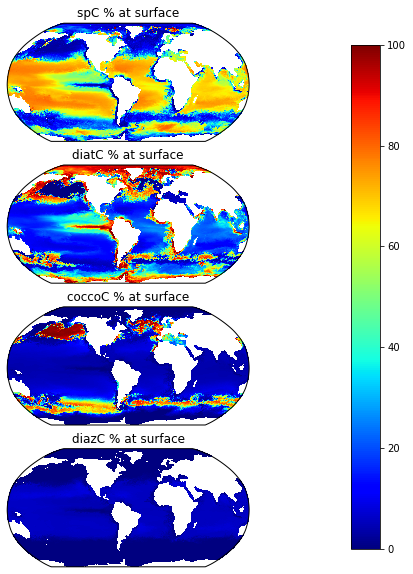

In [27]:
fig = plt.figure(figsize=(8,10))

ax = fig.add_subplot(4,1,3, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('coccoC % at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, perc_cocco.isel(z_t_150m=0), cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())

ax = fig.add_subplot(4,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diatC % at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, perc_diat.isel(z_t_150m=0), cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())

ax = fig.add_subplot(4,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('spC % at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, perc_sp.isel(z_t_150m=0), cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())

ax = fig.add_subplot(4,1,4, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('diazC % at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, perc_diaz.isel(z_t_150m=0), cmap='jet',vmin=0,vmax=100,transform=ccrs.PlateCarree())

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(pc, cax=cbar_ax);

### Plot zooC

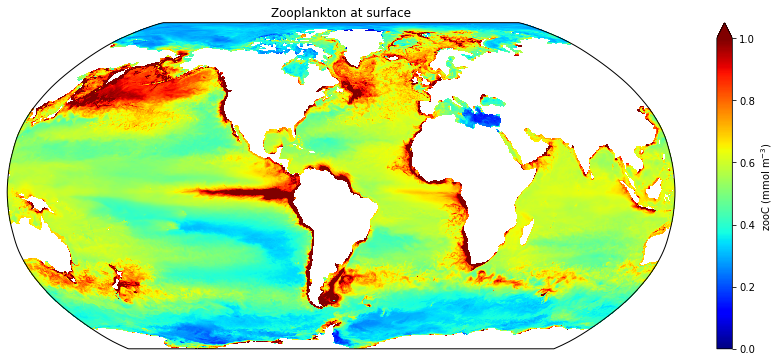

In [28]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('Zooplankton at surface', fontsize=12)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.zooC.isel(z_t_150m=0), cmap='jet',vmin=0,vmax=1,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='zooC (mmol m$^{-3}$)')

In [29]:
zoo_biomass= esmlab.weighted_sum(cesm_ann_ds.zooC, weights=area_m, dim=['nlat', 'nlon']).compute() #mmol/m
zoo_biomass = zoo_biomass * 10. #mmol
zoo_biomass = zoo_biomass.sum(dim='z_t_150m')
zoo_biomass = zoo_biomass.values * 0.001* 1.e-15 * 12.011 #Pg
print('zoo biomass is ', zoo_biomass, ' Pg C.')

zoo biomass is  0.18283273672824754  Pg C.


### NPP

In [30]:
nmols_to_PgCyr = 1e-9 * 12. * 1e-15 * 365. * 86400.

In [31]:
cesm_ann_ds['photoC_TOT_zint'] = cesm_ann_ds.photoC_cocco_zint + cesm_ann_ds.photoC_diat_zint + cesm_ann_ds.photoC_diaz_zint + cesm_ann_ds.photoC_sp_zint

In [32]:
variables = [f'photoC_{phyto}_zint' for phyto in ['diat', 'sp', 'diaz', 'cocco', 'TOT']]

ds_glb = xr.Dataset()
for v in variables:
    ds_glb[v] = esmlab.statistics.weighted_sum(cesm_ann_ds[v], weights=area, dim=['nlat', 'nlon'])
    ds_glb[v].attrs = cesm_ann_ds[v].attrs

    #if ds1_annmean[v].units == 'mmol/m^3 cm/s':
    ds_glb[v] = ds_glb[v] * nmols_to_PgCyr        
    ds_glb[v].attrs['units'] = 'Pg C yr$^{-1}$'

ds_glb = ds_glb.compute()
ds_glb

<xarray.Dataset>
Dimensions:            ()
Data variables:
    photoC_diat_zint   float64 16.02
    photoC_sp_zint     float64 26.35
    photoC_diaz_zint   float64 1.454
    photoC_cocco_zint  float64 6.477
    photoC_TOT_zint    float64 50.31

### Calcification

In [33]:
## GLOBALLY integrated calcification; observation-based estimates range from 0.8 to 2.4 Pg CaCO3 per year 
## (Feely et al., 2004, Maranon et al., 2016, Smith et al., 2016, Balch et al., 2007, Iglesias-Rodriguez et al., 2002)
ds_glb['CaCO3_PROD_zint'] = esmlab.statistics.weighted_sum(cesm_ann_ds['CaCO3_PROD_zint'], weights=area, dim=['nlat', 'nlon'])
ds_glb['CaCO3_PROD_zint'] = ds_glb['CaCO3_PROD_zint'] * nmols_to_PgCyr
ds_glb['CaCO3_PROD_zint'].values
print('Globally integrated calcification is',ds_glb['CaCO3_PROD_zint'].values, 'Pg C per year')
print('(should be between 0.6 to 2.4 Pg C per year)')

Globally integrated calcification is 1.1314505277452505 Pg C per year
(should be between 0.6 to 2.4 Pg C per year)


In [34]:
#read in mean PIC
pic_file = '/glade/work/kristenk/satellite_data/processed/PIC_mean2003to2018_1deg.nc'
ds_pic=xr.open_dataset(pic_file, decode_times=False)
#ds_pic.PIC

In [35]:
#convert to mmol/m3 from mg/m3
ds_pic['PIC']=ds_pic.PIC / 12.011

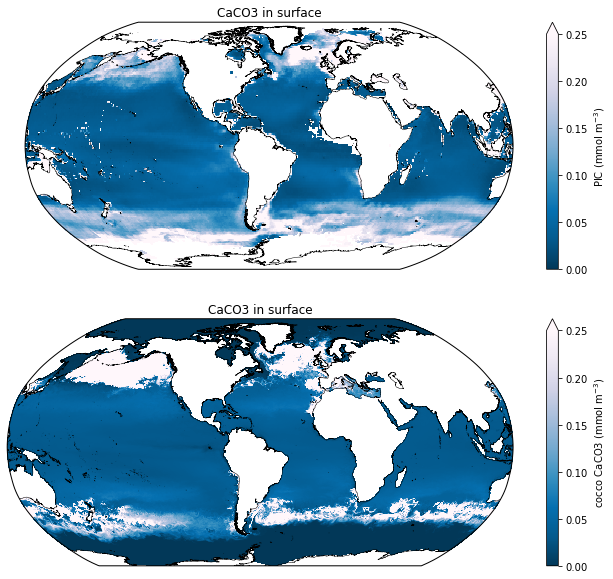

In [36]:
fig = plt.figure(figsize=(12,10))


ax = fig.add_subplot(2,1,1, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CaCO3 in surface', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(ds_pic.lon.values, ds_pic.lat.values, ds_pic.PIC, cmap='PuBu_r',vmin=0,vmax=0.25,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='PIC (mmol m$^{-3}$)')

ax = fig.add_subplot(2,1,2, projection=ccrs.Robinson(central_longitude=305.0))
ax.set_title('CaCO3 in surface', fontsize=12)
ax.coastlines('10m',linewidth=0.5)
pc=ax.pcolormesh(lons, lats, cesm_ann_ds.coccoCaCO3.isel(z_t_150m=0), cmap='PuBu_r',vmin=0,vmax=0.25,transform=ccrs.PlateCarree())

cbar1 = fig.colorbar(pc, ax=ax,extend='max',label='cocco CaCO3 (mmol m$^{-3}$)')


### N fixation

In [37]:
#global integral
tmp = cesm_ann_ds['diaz_Nfix'] * 10. #multiply by the thickness of each layer in the top 150m (10m)
tmp = tmp.sum(dim='z_t_150m') # unit is mmol/m2/s
ds_glb['diaz_Nfix'] = esmlab.statistics.weighted_sum(tmp, weights=area_m, dim=['nlat', 'nlon'])
ds_glb['diaz_Nfix'] = ds_glb['diaz_Nfix'] * 86400. * 365. * 0.001 * 14. * 1e-12 #convert to Tg N / yr
ds_glb['diaz_Nfix'].values
print('Globally integrated marine nitrogen fixation is',ds_glb['diaz_Nfix'].values, 'Tg N per year')
print('(should be between ~163.2 (range between 125.6 and 222.9 Tg N per year)')

Globally integrated marine nitrogen fixation is 153.4445864862823 Tg N per year
(should be between ~163.2 (range between 125.6 and 222.9 Tg N per year)


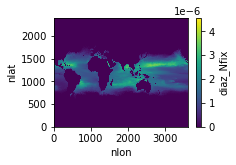

In [38]:
tmp.plot(figsize=(3,2))

### Alkalinity

In [39]:
file = '/glade/work/kristenk/GLODAPv2_regridded/glodap_pop_grid/GLODAP_POPgrid_v2.nc'
ds_glodap = xr.load_dataset(file, decode_times=False, decode_coords=False)
#ds_glodap['z_t']=cesm_ann_ds.z_t

In [40]:
# rmse_global['ALK']=esmlab.statistics.weighted_rmsd(cesm_ann_ds.ALK, ds_glodap.ALK, dim=['nlat', 'nlon'], weights=area)
# rmse_global.ALK.values

In [41]:
#ALK_diff = cesm_ann_ds.ALK - ds_glodap.ALK

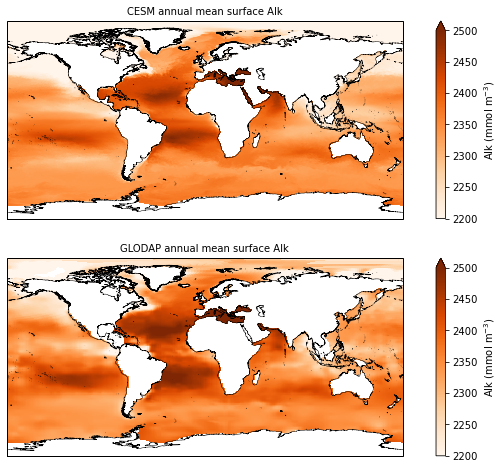

In [43]:
#plot surface alkalinity

fig = plt.figure(figsize=(12,8))

####################NO3
#COLUMN 1  - NO3
#---- CESM panel
ax = fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('CESM annual mean surface Alk', fontsize=10)
pc1=ax.pcolormesh(lons, lats, 
                 cesm_ann_ds.ALK.isel(z_t=0), cmap='Oranges',
                  vmin=2200, vmax=2500, 
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc1, ax=ax,extend='max',label='Alk (mmol m$^{-3}$)')

#---- OBS panel
ax = fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.coastlines('10m',linewidth=0.5)
ax.set_title('GLODAP annual mean surface Alk', fontsize=10)
pc2=ax.pcolormesh(ds_glodap.TLONG, ds_glodap.TLAT, 
                 ds_glodap.ALK.isel(z_t=0), cmap='Oranges',
                  vmin=2200, vmax=2500, 
                 transform=ccrs.PlateCarree())
cbar1 = fig.colorbar(pc2, ax=ax,extend='max',label='Alk (mmol m$^{-3}$)')

# #---- DIFF panel
# ax = fig.add_subplot(3,1,3, projection=ccrs.PlateCarree())
# ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
# ax.coastlines('10m',linewidth=0.5)
# ax.set_title('Surface Alk model bias', fontsize=10)
# pc3=ax.pcolormesh(lons, lats, 
#                  ALK_diff.isel(z_t=0), vmin=-100, vmax=100, cmap='bwr',
#                  transform=ccrs.PlateCarree())
# cbar1 = fig.colorbar(pc3, ax=ax,extend='both',label='Alk bias (mmol m$^{-3}$)')

### Global POC export

In [44]:
ds_glb['POC_FLUX_100m'] = esmlab.statistics.weighted_sum(cesm_ann_ds['POC_FLUX_100m'], weights=area, dim=['nlat', 'nlon'])
ds_glb['POC_FLUX_100m'] = ds_glb['POC_FLUX_100m'] * nmols_to_PgCyr
ds_glb['POC_FLUX_100m'].values
print('Globally integrated POC flux is',ds_glb['POC_FLUX_100m'].values, 'Pg C per year')

Globally integrated POC flux is 5.660139616025062 Pg C per year
